# 1.Import Neccessary Packge

In [87]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# 2. Basic Understanding Of The Dataset

In [88]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


2.1 Loading The Dataset

In [89]:
file1=pd.read_csv("/content/drive/MyDrive/Uidai Datset/api_data_aadhar_enrolment_0_500000.csv")
file2=pd.read_csv("/content/drive/MyDrive/Uidai Datset/api_data_aadhar_enrolment_500000_1000000.csv")
file3=pd.read_csv("/content/drive/MyDrive/Uidai Datset/api_data_aadhar_enrolment_1000000_1006029.csv")

In [90]:
df=pd.concat([file1,file2,file3],axis=0,ignore_index=True)
df

,date,state,district,pincode,age_0_5,age_5_17,age_18_greater
0,02-03-2025,Meghalaya,East Khasi Hills,793121,11,61,37
1,09-03-2025,Karnataka,Bengaluru Urban,560043,14,33,39
2,09-03-2025,Uttar Pradesh,Kanpur Nagar,208001,29,82,12
3,09-03-2025,Uttar Pradesh,Aligarh,202133,62,29,15
4,09-03-2025,Karnataka,Bengaluru Urban,560016,14,16,21
...,...,...,...,...,...,...,...
1006024,31-12-2025,West Bengal,West Midnapore,721149,2,0,0
1006025,31-12-2025,West Bengal,West Midnapore,721150,2,2,0
1006026,31-12-2025,West Bengal,West Midnapore,721305,0,1,0
1006027,31-12-2025,West Bengal,West Midnapore,721504,1,0,0


2.2 How many No of Rows and Columns prseent

In [91]:
df.shape

(1006029, 7)

2.3 Number of Category and Numerical Features

In [92]:
categorical_features = df.select_dtypes(include='object').columns.tolist()
numerical_features = df.select_dtypes(include=['int64']).columns.tolist()

print("Categorical Features:", categorical_features)
print("Numerical Features:", numerical_features)

Categorical Features: ['date', 'state', 'district']
Numerical Features: ['pincode', 'age_0_5', 'age_5_17', 'age_18_greater']


2.4 No of NaN values

In [93]:
df.isnull().sum()

,0
date,0
state,0
district,0
pincode,0
age_0_5,0
age_5_17,0
age_18_greater,0


2.5 No of Unique value in each Columns

In [94]:
def unique(df,col):
  print("No of Unique Value in ",col,"is",df[col].nunique())

In [95]:
for i in df.columns:
  unique(df,i)

No of Unique Value in  date is 92
No of Unique Value in  state is 55
No of Unique Value in  district is 985
No of Unique Value in  pincode is 19463
No of Unique Value in  age_0_5 is 671
No of Unique Value in  age_5_17 is 624
No of Unique Value in  age_18_greater is 199


2.6 No of Duplicate Value

In [96]:
df.duplicated().sum()

np.int64(22957)

## Conclusion :



*   There are 1006029 rows and Columns
*   No of Category Feature are 3 and Numeric Feature are 4


*   There is No any NaN value is found
*   There 22957 Duplicate Data





# 3. Data Preprocessing

3.1 Data Type Validation



*   Checking Whether all the Date in The format of 'DD-MM-YYYY'
*   Creating Separate column for day,Month and Year






In [97]:
initial_date_type = df['date'].dtype
df['date_checked'] = pd.to_datetime(df['date'], format='%d-%m-%Y', errors='coerce')

invalid_dates_count = df['date_checked'].isnull().sum()

print(f"Initial 'date' column dtype: {initial_date_type}")

if invalid_dates_count == 0:
    print("All dates in the 'date' column are in 'dd-mm-yyyy' format.")
else:
    print(f"Found {invalid_dates_count} dates not in 'dd-mm-yyyy' format. (Out of {len(df)} total dates)")
    print("Rows with invalid date format:")
    display(df[df['date_checked'].isnull()])

df['date']=df['date_checked']
df = df.drop(columns=['date_checked'])


Initial 'date' column dtype: object
All dates in the 'date' column are in 'dd-mm-yyyy' format.


In [98]:
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

print("DataFrame after extracting day, month, year :")
display(df.head())

DataFrame after extracting day, month, year :


,date,state,district,pincode,age_0_5,age_5_17,age_18_greater,day,month,year
0,2025-03-02,Meghalaya,East Khasi Hills,793121,11,61,37,2,3,2025
1,2025-03-09,Karnataka,Bengaluru Urban,560043,14,33,39,9,3,2025
2,2025-03-09,Uttar Pradesh,Kanpur Nagar,208001,29,82,12,9,3,2025
3,2025-03-09,Uttar Pradesh,Aligarh,202133,62,29,15,9,3,2025
4,2025-03-09,Karnataka,Bengaluru Urban,560016,14,16,21,9,3,2025




*   Correcting and Removing Wrong State names



In [99]:
df['state'].unique()

array(['Meghalaya', 'Karnataka', 'Uttar Pradesh', 'Bihar', 'Maharashtra',
       'Haryana', 'Rajasthan', 'Punjab', 'Delhi', 'Madhya Pradesh',
       'West Bengal', 'Assam', 'Uttarakhand', 'Gujarat', 'Andhra Pradesh',
       'Tamil Nadu', 'Chhattisgarh', 'Jharkhand', 'Nagaland', 'Manipur',
       'Telangana', 'Tripura', 'Mizoram', 'Jammu and Kashmir',
       'Chandigarh', 'Sikkim', 'Odisha', 'Kerala',
       'The Dadra And Nagar Haveli And Daman And Diu',
       'Arunachal Pradesh', 'Himachal Pradesh', 'Goa',
       'Jammu And Kashmir', 'Dadra and Nagar Haveli and Daman and Diu',
       'Ladakh', 'Andaman and Nicobar Islands', 'Orissa', 'Pondicherry',
       'Puducherry', 'Lakshadweep', 'Andaman & Nicobar Islands',
       'Dadra & Nagar Haveli', 'Dadra and Nagar Haveli', 'Daman and Diu',
       'WEST BENGAL', 'Jammu & Kashmir', 'West  Bengal', '100000',
       'Daman & Diu', 'West Bangal', 'Westbengal', 'West bengal',
       'andhra pradesh', 'ODISHA', 'WESTBENGAL'], dtype=object)

In [100]:
state_correction_map = {
    # Andhra Pradesh
    "andhra pradesh": "Andhra Pradesh",

    # Odisha
    "odisha": "Odisha",
    "orissa": "Odisha",

    # West Bengal
    "west bengal": "West Bengal",
    "west  bengal": "West Bengal",
    "westbengal": "West Bengal",
    "west bangal": "West Bengal",
    "westbengal ": "West Bengal",
    "westbengal": "West Bengal",
    "westbengal": "West Bengal",

    # Jammu & Kashmir
    "jammu and kashmir": "Jammu and Kashmir",
    "jammu & kashmir": "Jammu and Kashmir",
    "jammu and kashmir ": "Jammu and Kashmir",

    # Dadra & Nagar Haveli and Daman & Diu (merged UT)
    "the dadra and nagar haveli and daman and diu":
        "Dadra and Nagar Haveli and Daman and Diu",
    "dadra and nagar haveli and daman and diu":
        "Dadra and Nagar Haveli and Daman and Diu",
    "dadra & nagar haveli":
        "Dadra and Nagar Haveli and Daman and Diu",
    "daman and diu":
        "Dadra and Nagar Haveli and Daman and Diu",
    "daman & diu":
        "Dadra and Nagar Haveli and Daman and Diu",

    # Andaman & Nicobar
    "andaman & nicobar islands": "Andaman and Nicobar Islands",
    "andaman and nicobar islands": "Andaman and Nicobar Islands",

    # Puducherry
    "pondicherry": "Puducherry",
    "puducherry": "Puducherry",

    # Ladakh
    "ladakh": "Ladakh",

    # Misc casing errors
    "west bengal": "West Bengal",
    "westbengal": "West Bengal",
    "odisha": "Odisha",
    "andhra pradesh": "Andhra Pradesh"
}


In [101]:
def correct_state_name(state):
    if not isinstance(state, str):
        return None

    cleaned = state.strip().lower()
    cleaned = " ".join(cleaned.split())

    return state_correction_map.get(cleaned, state.title())


In [102]:
df["state"] = df["state"].apply(correct_state_name)


3.2 Column Name Standarization


*   Already Standarized that is every name is in lower case and underscore is used to sperated two words



In [103]:
df.columns

Index(['date', 'state', 'district', 'pincode', 'age_0_5', 'age_5_17',
       'age_18_greater', 'day', 'month', 'year'],
      dtype='object')

3.3 Find Missing value and Handling it

In [ ]:
df['state'].unique()

In [ ]:
cond=df['state']=='100000'
df[cond]

In [ ]:
df['state'] = df['state'].replace("100000", "Unknown")

In [ ]:
df['state'].unique()

In [108]:
cond = (df['pincode'] < 110001)
df[cond]

,date,state,district,pincode,age_0_5,age_5_17,age_18_greater,day,month,year
23108,2025-09-02,Unknown,100000,100000,0,0,3,2,9,2025
46946,2025-09-03,Unknown,100000,100000,0,0,1,3,9,2025
97816,2025-09-08,Unknown,100000,100000,0,0,1,8,9,2025
115798,2025-09-09,Unknown,100000,100000,0,0,1,9,9,2025
153156,2025-09-11,Unknown,100000,100000,0,0,2,11,9,2025
160195,2025-09-12,Unknown,100000,100000,0,0,2,12,9,2025
261778,2025-09-19,Unknown,100000,100000,0,0,1,19,9,2025
272731,2025-09-20,Unknown,100000,100000,0,0,1,20,9,2025
470934,2025-10-24,Unknown,100000,100000,0,1,0,24,10,2025
762744,2025-11-15,Unknown,100000,100000,0,0,3,15,11,2025


In [109]:
df = df[df['state'] != 'Unknown']

print("DataFrame after removing 'Unknown' states:")
display(df.head())

DataFrame after removing 'Unknown' states:


,date,state,district,pincode,age_0_5,age_5_17,age_18_greater,day,month,year
0,2025-03-02,Meghalaya,East Khasi Hills,793121,11,61,37,2,3,2025
1,2025-03-09,Karnataka,Bengaluru Urban,560043,14,33,39,9,3,2025
2,2025-03-09,Uttar Pradesh,Kanpur Nagar,208001,29,82,12,9,3,2025
3,2025-03-09,Uttar Pradesh,Aligarh,202133,62,29,15,9,3,2025
4,2025-03-09,Karnataka,Bengaluru Urban,560016,14,16,21,9,3,2025


3.4 Duplicate Values

In [110]:
df.duplicated(keep=False).sum()

np.int64(46845)

In [111]:
exact_duplicates = df[df.duplicated(keep=False)]
exact_duplicates.head(10)

,date,state,district,pincode,age_0_5,age_5_17,age_18_greater,day,month,year
5057,2025-09-01,Odisha,Bargarh,768103,1,0,0,1,9,2025
5096,2025-09-01,Odisha,Ganjam,761008,1,0,0,1,9,2025
5185,2025-09-01,Odisha,Rayagada,765018,1,0,0,1,9,2025
5204,2025-09-01,Odisha,Balangir,767066,2,0,0,1,9,2025
5205,2025-09-01,Odisha,Baleshwar,756041,0,1,0,1,9,2025
5207,2025-09-01,Odisha,Bargarh,768103,1,0,0,1,9,2025
5209,2025-09-01,Odisha,Ganjam,760008,1,0,0,1,9,2025
5211,2025-09-01,Odisha,Jajapur,755025,1,0,0,1,9,2025
5220,2025-09-01,Puducherry,Karaikal,609602,2,0,0,1,9,2025
8138,2025-09-01,Andaman and Nicobar Islands,South Andaman,744207,1,0,0,1,9,2025


In [112]:
df= df.drop_duplicates(keep="first")


In [113]:
df.duplicated(keep=False).sum()

np.int64(0)

In [114]:
df.duplicated().sum()


np.int64(0)

In [115]:
df.shape

(982576, 10)

# 4. Exploratory Data Analysis

*   We are Categorising The state and union terriorist based on geographical region



In [116]:
india_region_map = {
    "North": [
        "Delhi",
        "Haryana",
        "Punjab",
        "Himachal Pradesh",
        "Jammu and Kashmir",
        "Ladakh",
        "Chandigarh",
        "Rajasthan"
    ],

    "South": [
        "Tamil Nadu",
        "Kerala",
        "Karnataka",
        "Andhra Pradesh",
        "Telangana",
        "Puducherry"
    ],

    "East": [
        "West Bengal",
        "Bihar",
        "Odisha",
        "Jharkhand"
    ],

    "West": [
        "Maharashtra",
        "Gujarat",
        "Goa",
        "Dadra and Nagar Haveli and Daman and Diu",
        "Dadra And Nagar Haveli"
    ],

    "Central": [
        "Madhya Pradesh",
        "Chhattisgarh",
        "Uttar Pradesh",
        "Uttarakhand"
    ],

    "North-East": [
        "Assam",
        "Meghalaya",
        "Manipur",
        "Mizoram",
        "Nagaland",
        "Tripura",
        "Arunachal Pradesh",
        "Sikkim"
    ],

    "Islands": [
        "Andaman and Nicobar Islands",
        "Lakshadweep"
    ]
}


Map The State According To The Zone

In [117]:
def get_region(state, region_map):
    for region, states_list in region_map.items():
        if state in states_list:
            return region
    return 'Unknown Region'

df['geographical'] = df['state'].apply(lambda x: get_region(x, india_region_map))
display(df.head())

,date,state,district,pincode,age_0_5,age_5_17,age_18_greater,day,month,year,geographical
0,2025-03-02,Meghalaya,East Khasi Hills,793121,11,61,37,2,3,2025,North-East
1,2025-03-09,Karnataka,Bengaluru Urban,560043,14,33,39,9,3,2025,South
2,2025-03-09,Uttar Pradesh,Kanpur Nagar,208001,29,82,12,9,3,2025,Central
3,2025-03-09,Uttar Pradesh,Aligarh,202133,62,29,15,9,3,2025,Central
4,2025-03-09,Karnataka,Bengaluru Urban,560016,14,16,21,9,3,2025,South


In [118]:
df['date'].min()

Timestamp('2025-03-02 00:00:00')

In [119]:
df['date'].max()

Timestamp('2025-12-31 00:00:00')

(A) No of Aadhar Enrollment across Different Geographical region between 2025-03-02 to 2025-12-31

In [120]:
enrollments_by_region = df.groupby('geographical')[['age_0_5', 'age_5_17', 'age_18_greater']].sum()
print("Total Aadhar enrollments by geographical region:")
display(enrollments_by_region)

Total Aadhar enrollments by geographical region:


,age_0_5,age_5_17,age_18_greater
geographical,,,
Central,985832,611945,29475
East,718437,495734,22432
Islands,647,42,1
North,496643,161969,13450
North-East,182702,143736,59985
South,623297,125618,16534
West,466326,151840,24372


In [121]:
enrollments_by_region['Total_Enrollments'] = enrollments_by_region.sum(axis=1)
print("Enrollments by region with total:")
display(enrollments_by_region)

Enrollments by region with total:


,age_0_5,age_5_17,age_18_greater,Total_Enrollments
geographical,,,,
Central,985832,611945,29475,1627252
East,718437,495734,22432,1236603
Islands,647,42,1,690
North,496643,161969,13450,672062
North-East,182702,143736,59985,386423
South,623297,125618,16534,765449
West,466326,151840,24372,642538


## 4.1 Bar Chart : Total Aadhaar Enrolments by Zone Wise\n(March 2025 – December 2025)

/tmp/ipython-input-2124886439.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


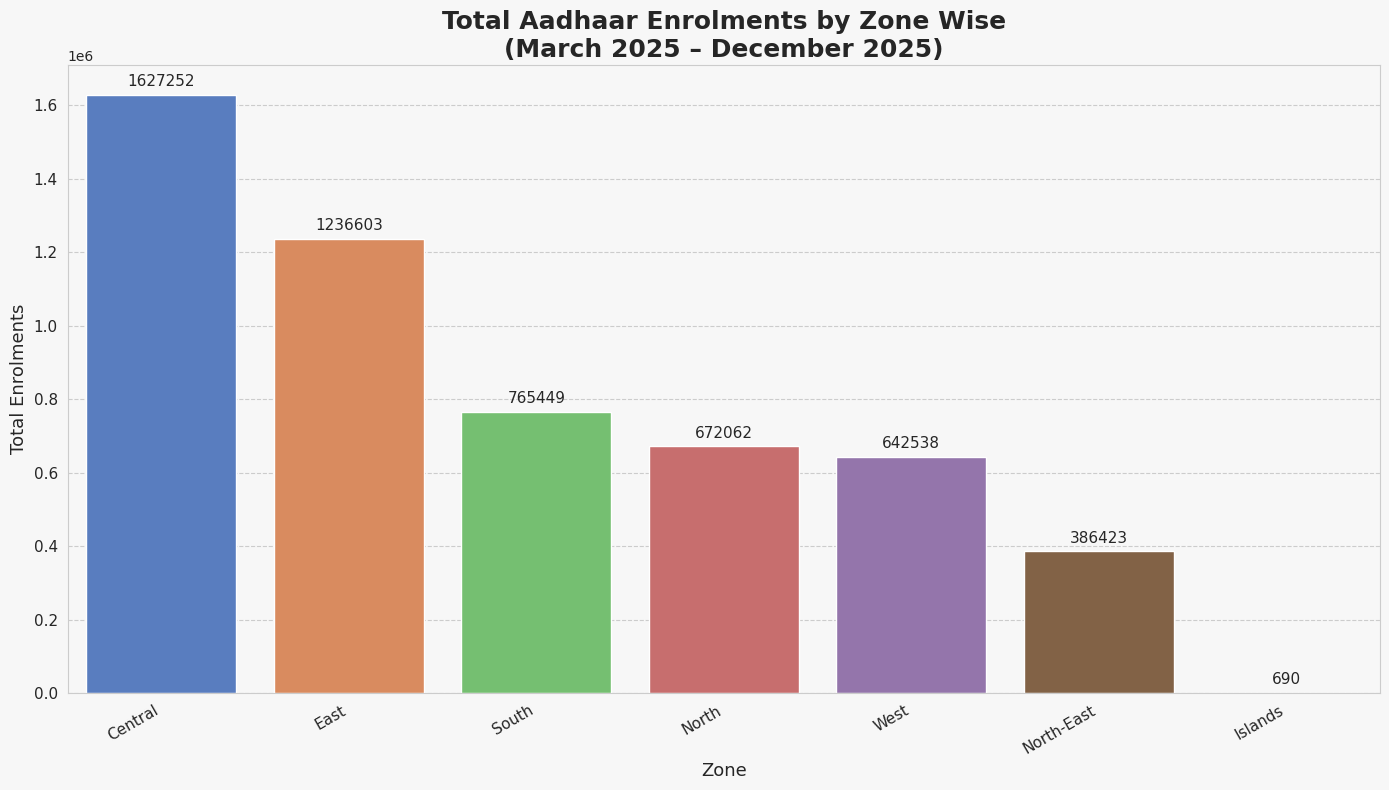

In [122]:


sns.set_style("whitegrid")

plt.figure(figsize=(14, 8))
plt.gca().set_facecolor('#f7f7f7')
plt.gcf().set_facecolor('#f7f7f7')


sorted_enrollments_by_region = enrollments_by_region.sort_values(
    by='Total_Enrollments', ascending=False
)


ax = sns.barplot(
    x=sorted_enrollments_by_region.index,
    y='Total_Enrollments',
    data=sorted_enrollments_by_region,
    palette='muted'
)


for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', padding=4, fontsize=11)


plt.title(
    'Total Aadhaar Enrolments by Zone Wise\n(March 2025 – December 2025)',
    fontsize=18,
    fontweight='bold'
)
plt.xlabel('Zone', fontsize=13)
plt.ylabel('Total Enrolments', fontsize=13)

plt.xticks(rotation=30, ha='right', fontsize=11)
plt.yticks(fontsize=11)

plt.grid(axis='y', linestyle='--', alpha=1)

plt.tight_layout()
plt.show()



## 4.2 Heat Map : Heatmap of Monthly Aadhaar Enrolments by Zone

In [123]:
enrollments_by_state = df.groupby('state')[['age_0_5', 'age_5_17', 'age_18_greater']].sum()
enrollments_by_state['Total_Enrollments'] = enrollments_by_state.sum(axis=1)

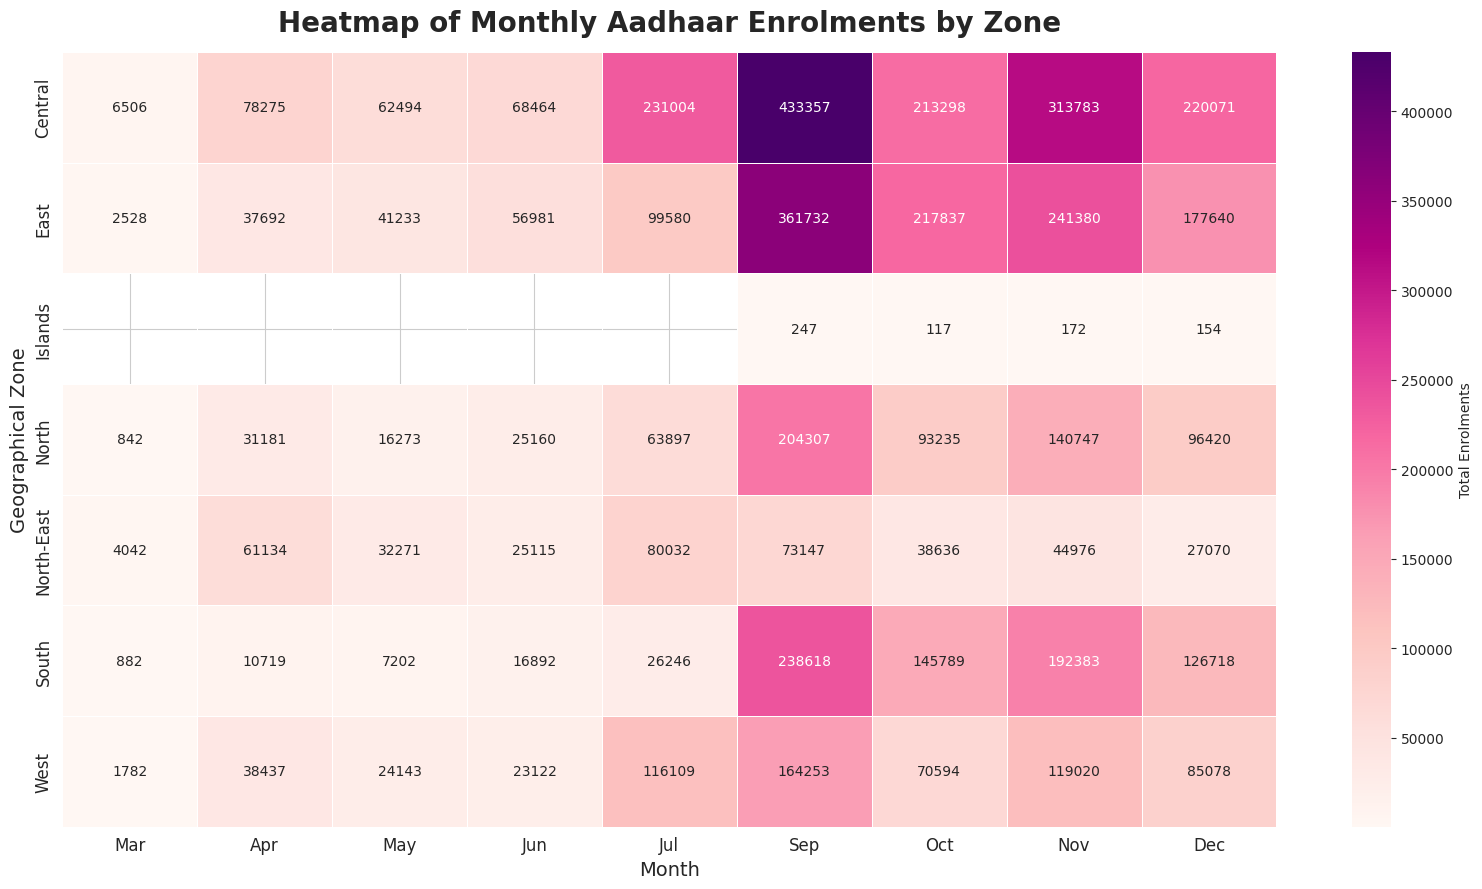

In [124]:
plot_df = monthly_regional_enrollments.reset_index()

month_map = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}
plot_df['month_name'] = plot_df['month'].map(month_map)

heatmap_df = plot_df.pivot(
    index='geographical',
    columns='month_name',
    values='Total_Enrollments'
)

month_order = [month_map[m] for m in sorted(plot_df['month'].unique())]
heatmap_df = heatmap_df[month_order]


plt.figure(figsize=(16, 9))
sns.heatmap(
    heatmap_df,
    cmap='RdPu',
    linewidths=0.5,
    annot=True, # Changed from False to True
    fmt='g', # Format the annotations to general format
    cbar_kws={'label': 'Total Enrolments'}
)

plt.title(
    'Heatmap of Monthly Aadhaar Enrolments by Zone',
    fontsize=20,
    fontweight='bold',
    pad=15
)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Geographical Zone', fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

In [125]:
monthly_regional_enrollments = df.groupby(['month', 'geographical'])[['age_0_5', 'age_5_17', 'age_18_greater']].sum()
monthly_regional_enrollments['Total_Enrollments'] = monthly_regional_enrollments.sum(axis=1)

## 4.3 Bar Chart : Total Aadhar Enrollments by State (Sorted Highest to Lowest

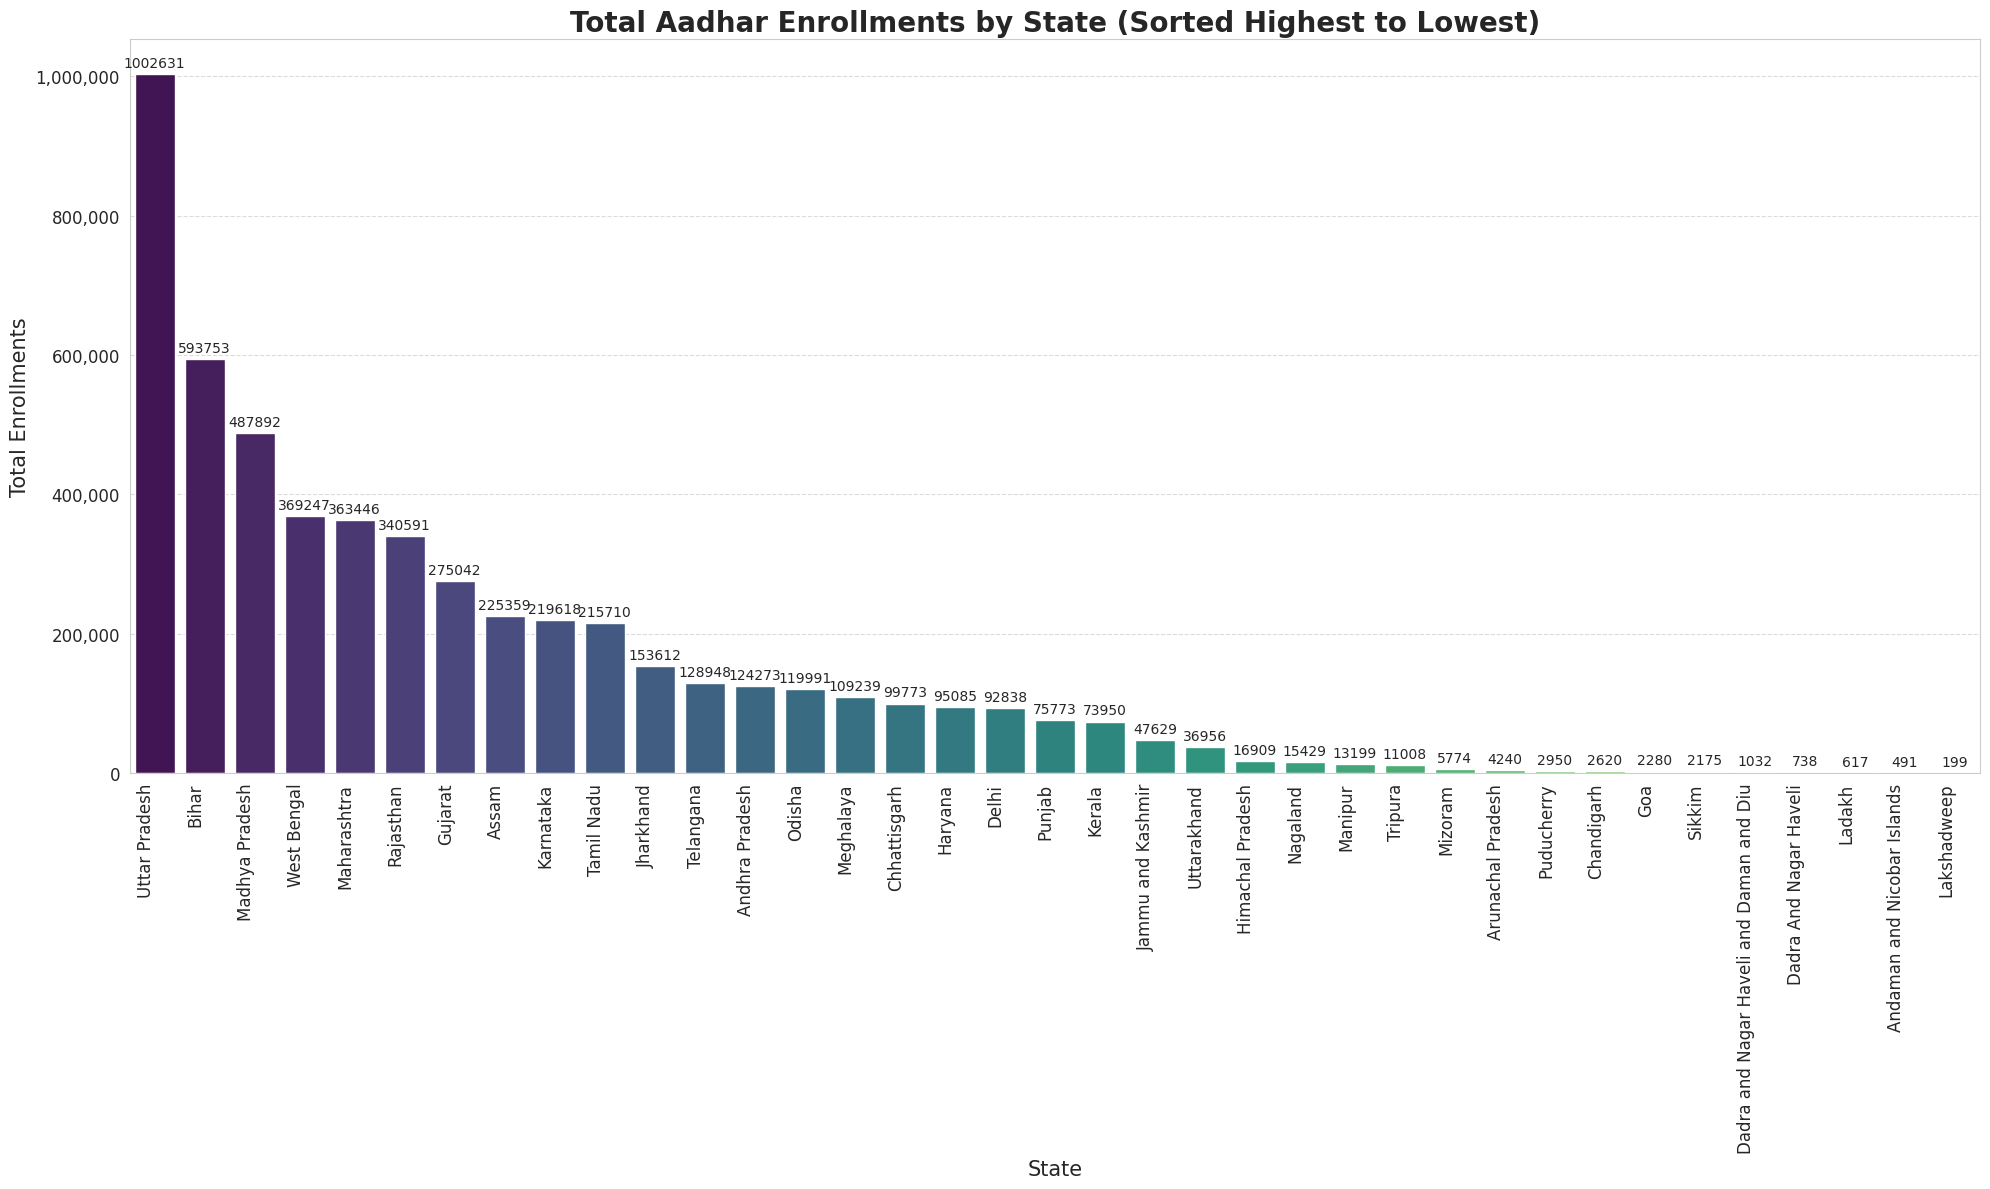

In [126]:
plt.figure(figsize=(20, 12))

sorted_enrollments = enrollments_by_state.sort_values(by='Total_Enrollments', ascending=False)

ax = sns.barplot(x=sorted_enrollments.index, y='Total_Enrollments', data=sorted_enrollments, palette='viridis', hue=sorted_enrollments.index, legend=False)


for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', padding=3)


ax.ticklabel_format(style='plain', axis='y')
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.title('Total Aadhar Enrollments by State (Sorted Highest to Lowest)', fontsize=20, fontweight='bold')
plt.xlabel('State', fontsize=15)
plt.ylabel('Total Enrollments', fontsize=15)
plt.xticks(rotation=90, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## 4.4 Bar Chart : Aadhar Enrollments Age 0 to 5 By Geographical Region

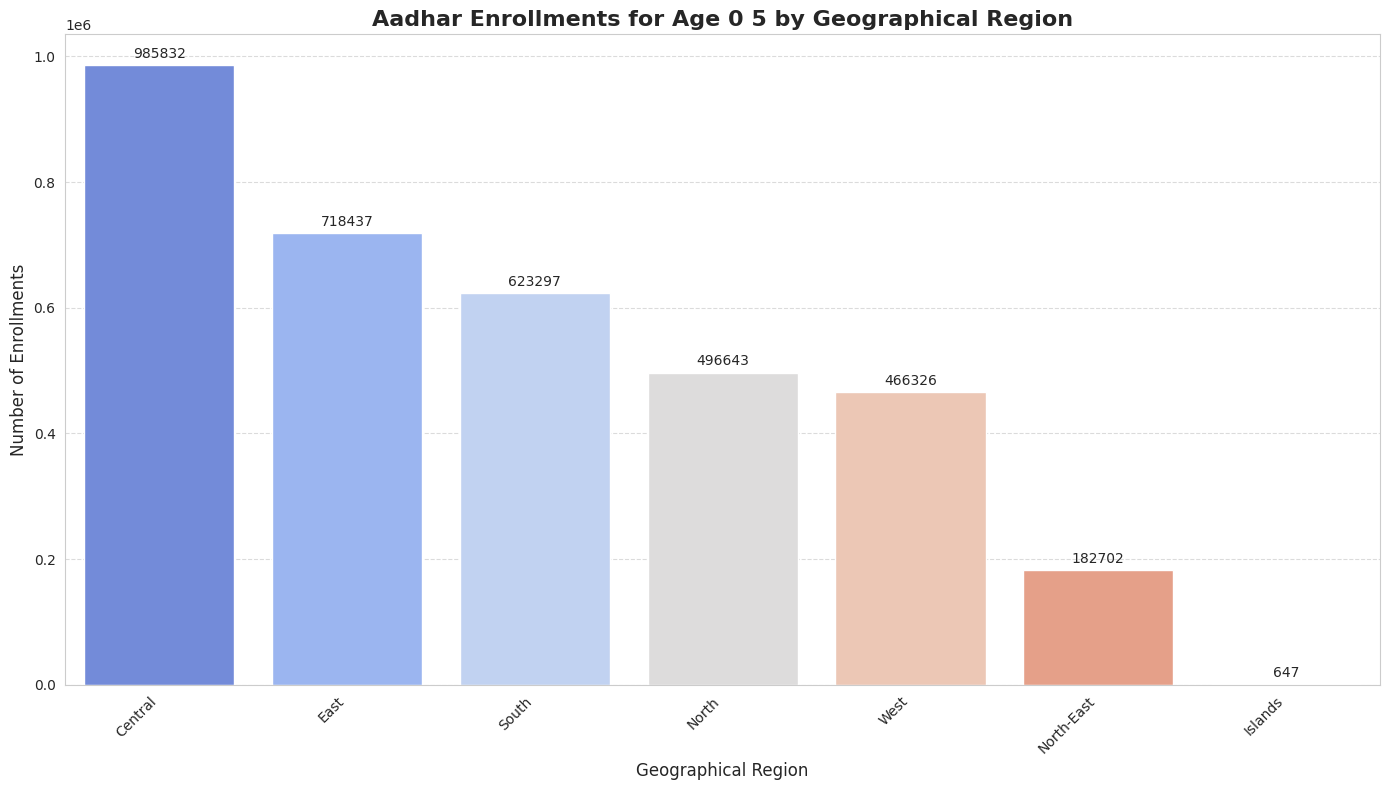

In [127]:
age_col = 'age_0_5'
plt.figure(figsize=(14, 8))
sorted_data = enrollments_by_region.sort_values(by=age_col, ascending=False)
ax = sns.barplot(x=sorted_data.index, y=age_col, data=sorted_data, palette='coolwarm', hue=sorted_data.index, legend=False)
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', padding=3)
plt.title(f'Aadhar Enrollments for {age_col.replace("_", " ").title()} by Geographical Region', fontsize=16, fontweight='bold')
plt.xlabel('Geographical Region', fontsize=12)
plt.ylabel('Number of Enrollments', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## 4.5 Bar Chart : Aadhar Enrollments for Age 5-17 by Geographical Region

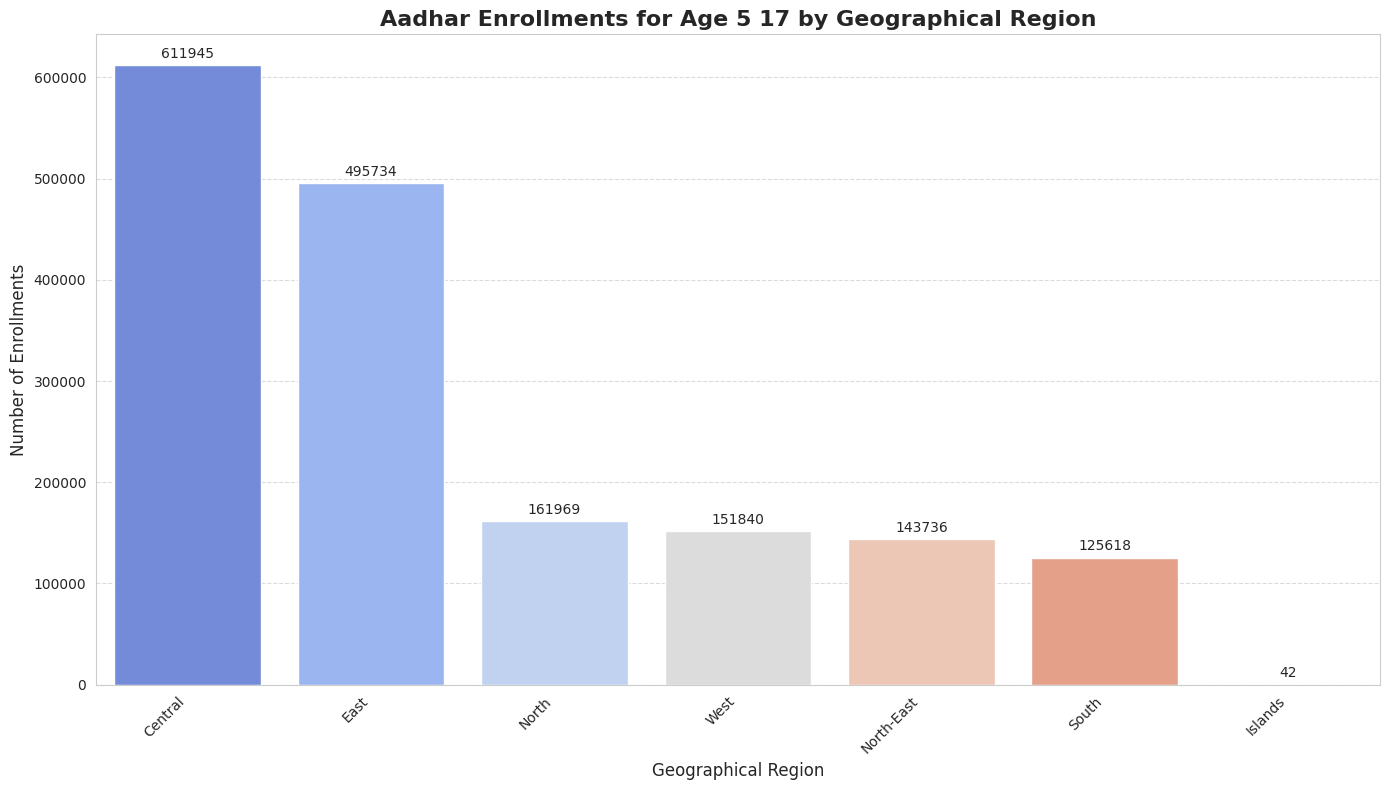

In [128]:
age_col = 'age_5_17'
plt.figure(figsize=(14, 8))
sorted_data = enrollments_by_region.sort_values(by=age_col, ascending=False)
ax = sns.barplot(x=sorted_data.index, y=age_col, data=sorted_data, palette='coolwarm', hue=sorted_data.index, legend=False)
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', padding=3)
plt.title(f'Aadhar Enrollments for {age_col.replace("_", " ").title()} by Geographical Region', fontsize=16, fontweight='bold')
plt.xlabel('Geographical Region', fontsize=12)
plt.ylabel('Number of Enrollments', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## 4.6 Bar Chart : Aadhar Enrollments for Age 18+ by Geographical Region

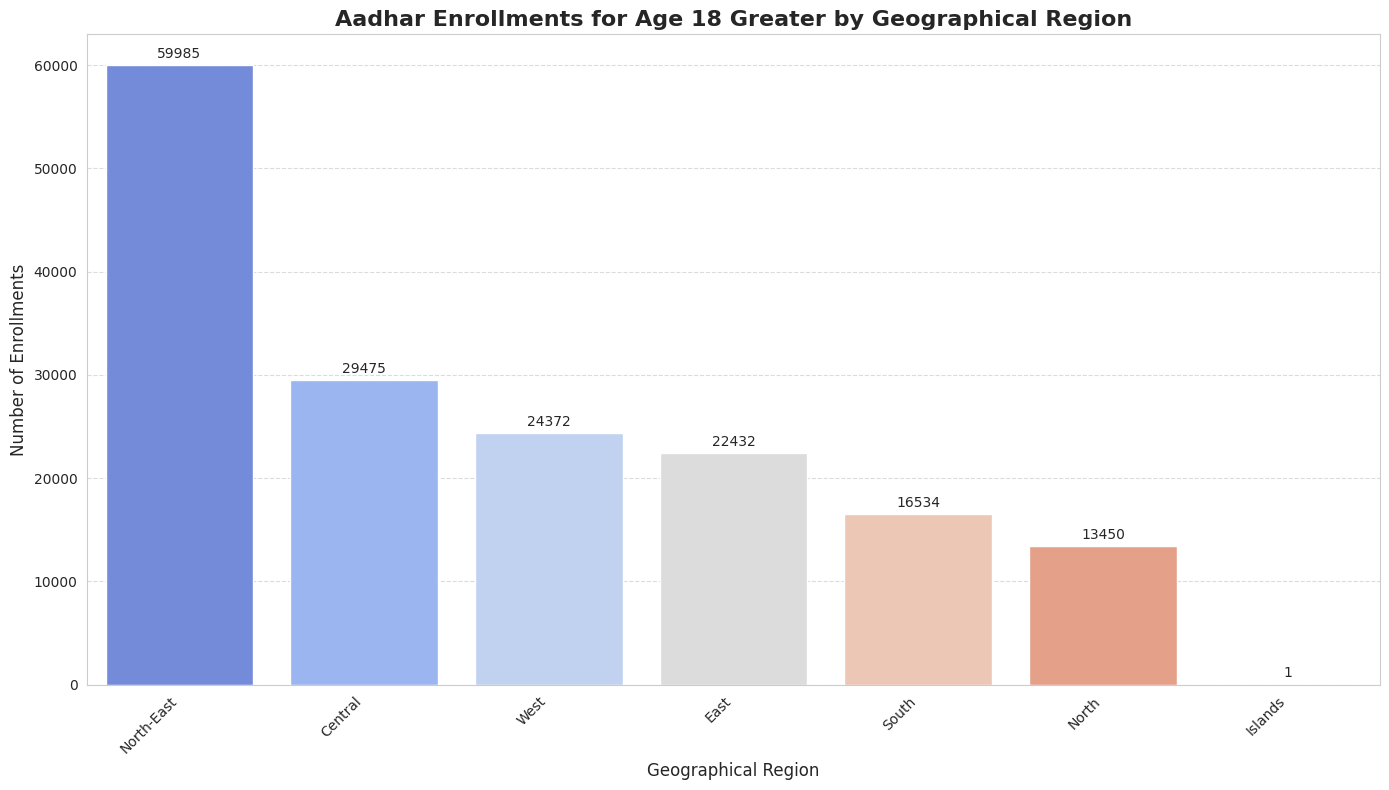

In [129]:
age_col = 'age_18_greater'
plt.figure(figsize=(14, 8))
sorted_data = enrollments_by_region.sort_values(by=age_col, ascending=False)
ax = sns.barplot(x=sorted_data.index, y=age_col, data=sorted_data, palette='coolwarm', hue=sorted_data.index, legend=False)
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', padding=3)
plt.title(f'Aadhar Enrollments for {age_col.replace("_", " ").title()} by Geographical Region', fontsize=16, fontweight='bold')
plt.xlabel('Geographical Region', fontsize=12)
plt.ylabel('Number of Enrollments', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## 4.7 Bar Chart : Total Enrollments by Age Category

In [130]:
category_enrollments = pd.Series({
    'age_0_5': df['age_0_5'].sum(),
    'age_5_17': df['age_5_17'].sum(),
    'age_18_greater': df['age_18_greater'].sum()
})

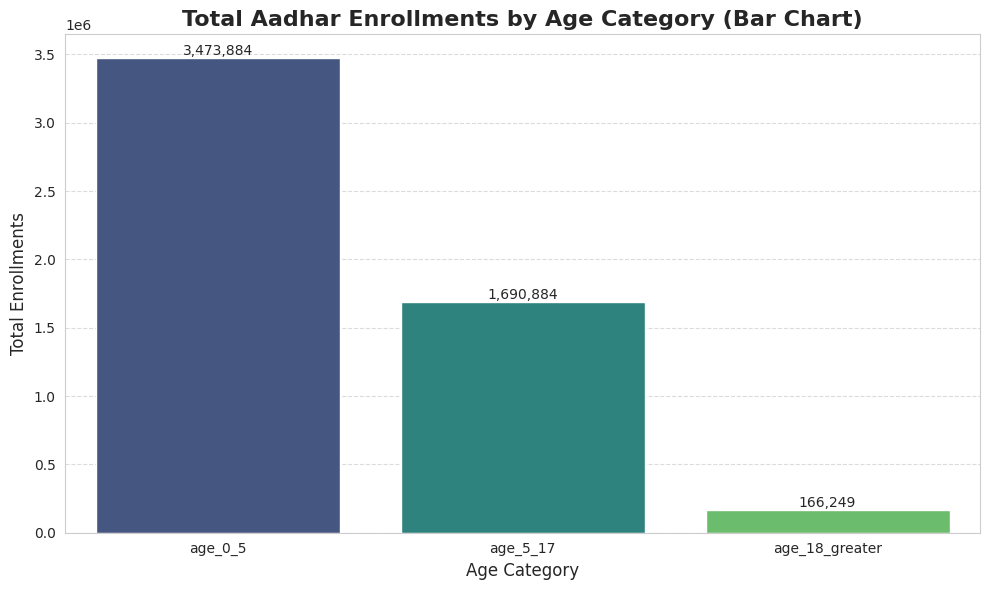

In [131]:
plt.figure(figsize=(10, 6))
sns.barplot(x=category_enrollments.index, y=category_enrollments.values, palette='viridis', hue=category_enrollments.index, legend=False)


for index, value in enumerate(category_enrollments.values):
    plt.text(index, value, f'{value:,.0f}', ha='center', va='bottom', fontsize=10)

plt.title('Total Aadhar Enrollments by Age Category (Bar Chart)', fontsize=16, fontweight='bold')
plt.xlabel('Age Category', fontsize=12)
plt.ylabel('Total Enrollments', fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## 4.8 Pie Chart : Total Enrollments by Age Category with Percentages

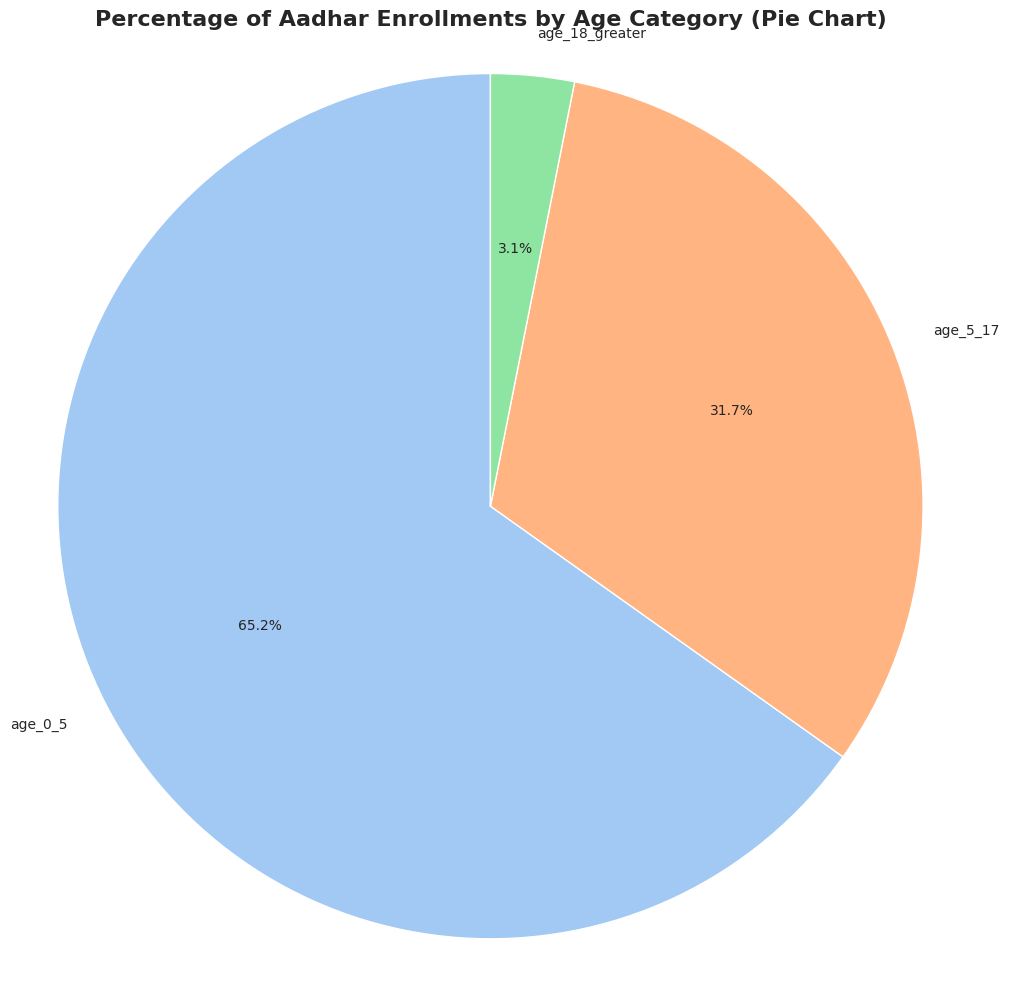

In [132]:
plt.figure(figsize=(10, 10))
plt.pie(category_enrollments.values, labels=category_enrollments.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Percentage of Aadhar Enrollments by Age Category (Pie Chart)', fontsize=16, fontweight='bold')
plt.axis('equal')
plt.tight_layout()
plt.show()

In [133]:
monthly_regional_enrollments = df.groupby(['month', 'geographical'])[['age_0_5', 'age_5_17', 'age_18_greater']].sum()
monthly_regional_enrollments['Total_Enrollments'] = monthly_regional_enrollments.sum(axis=1)

## 4.9 Monthly Aadhaar Enrolments by Zone

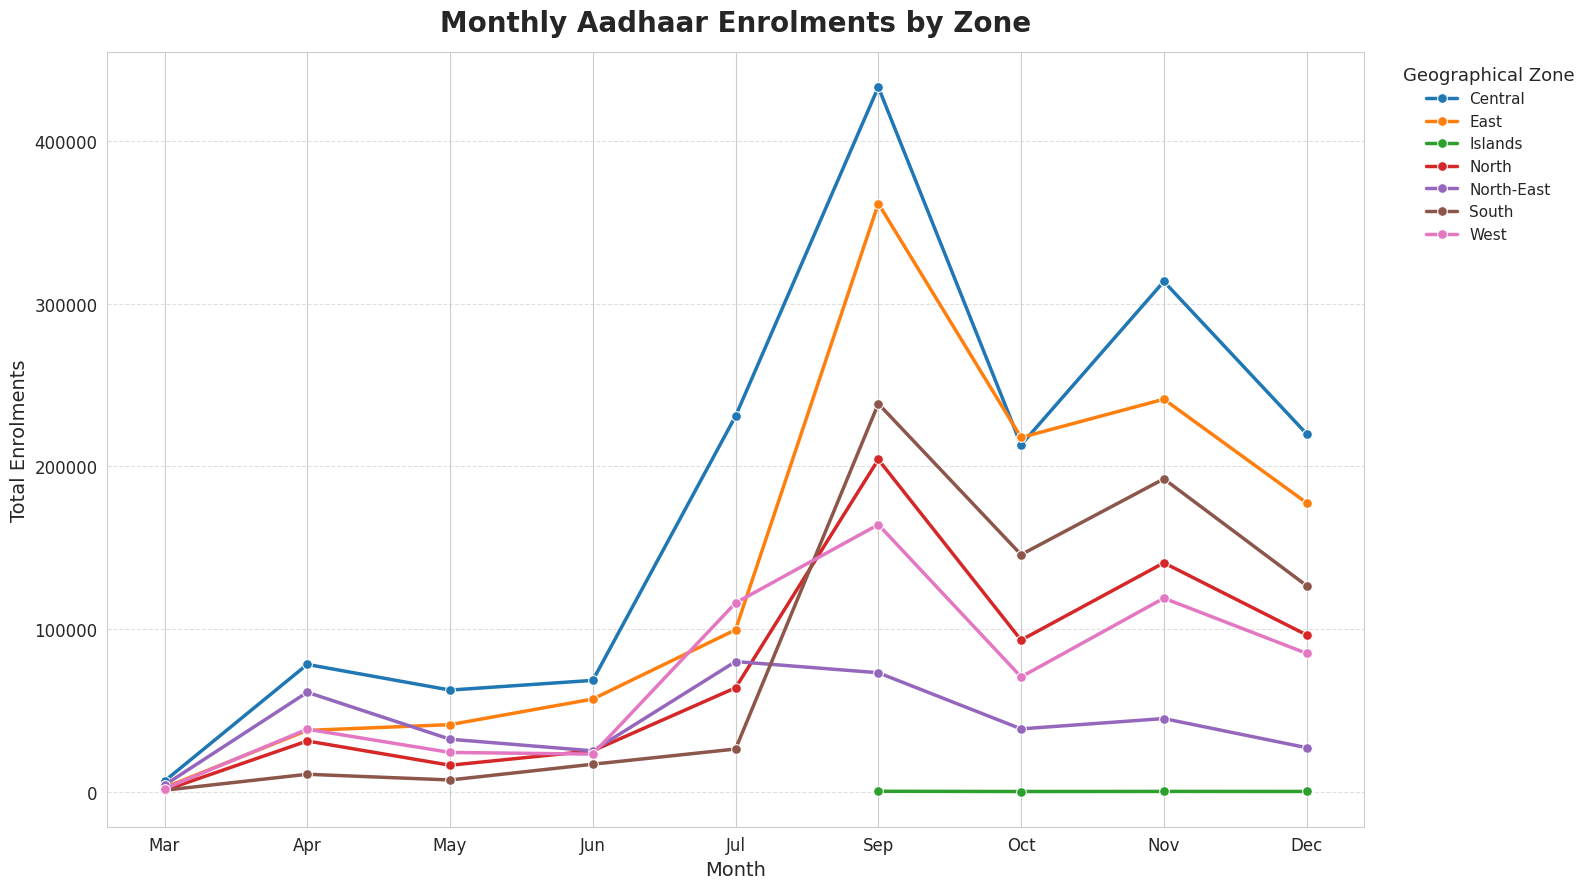

In [134]:

plot_df = monthly_regional_enrollments.reset_index()

month_map = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}
plot_df['month_name'] = plot_df['month'].map(month_map)

month_order = plot_df.sort_values('month')['month_name'].unique()


plt.figure(figsize=(16, 9))
sns.set_style("whitegrid")

sns.lineplot(
    data=plot_df,
    x='month_name',
    y='Total_Enrollments',
    hue='geographical',
    marker='o',
    linewidth=2.5,
    markersize=7,
    hue_order=sorted(plot_df['geographical'].unique()),
    palette='tab10'
)


plt.title(
    'Monthly Aadhaar Enrolments by Zone',
    fontsize=20,
    fontweight='bold',
    pad=15
)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Enrolments', fontsize=14)

plt.xticks(month_order, fontsize=12)
plt.yticks(fontsize=12)


plt.legend(
    title='Geographical Zone',
    title_fontsize=13,
    fontsize=11,
    bbox_to_anchor=(1.02, 1),
    loc='upper left',
    frameon=False
)

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [135]:
enrollments_by_region['Total_Enrollments'] = enrollments_by_region[['age_0_5', 'age_5_17', 'age_18_greater']].sum(axis=1)

regional_age_distribution = enrollments_by_region.copy()
regional_age_distribution['Prop_age_0_5'] = regional_age_distribution['age_0_5'] / regional_age_distribution['Total_Enrollments']
regional_age_distribution['Prop_age_5_17'] = regional_age_distribution['age_5_17'] / regional_age_distribution['Total_Enrollments']
regional_age_distribution['Prop_age_18_greater'] = regional_age_distribution['age_18_greater'] / regional_age_distribution['Total_Enrollments']



## 4.10 Proportion of Aadhaar Enrolments by Age Group and Zone Wise

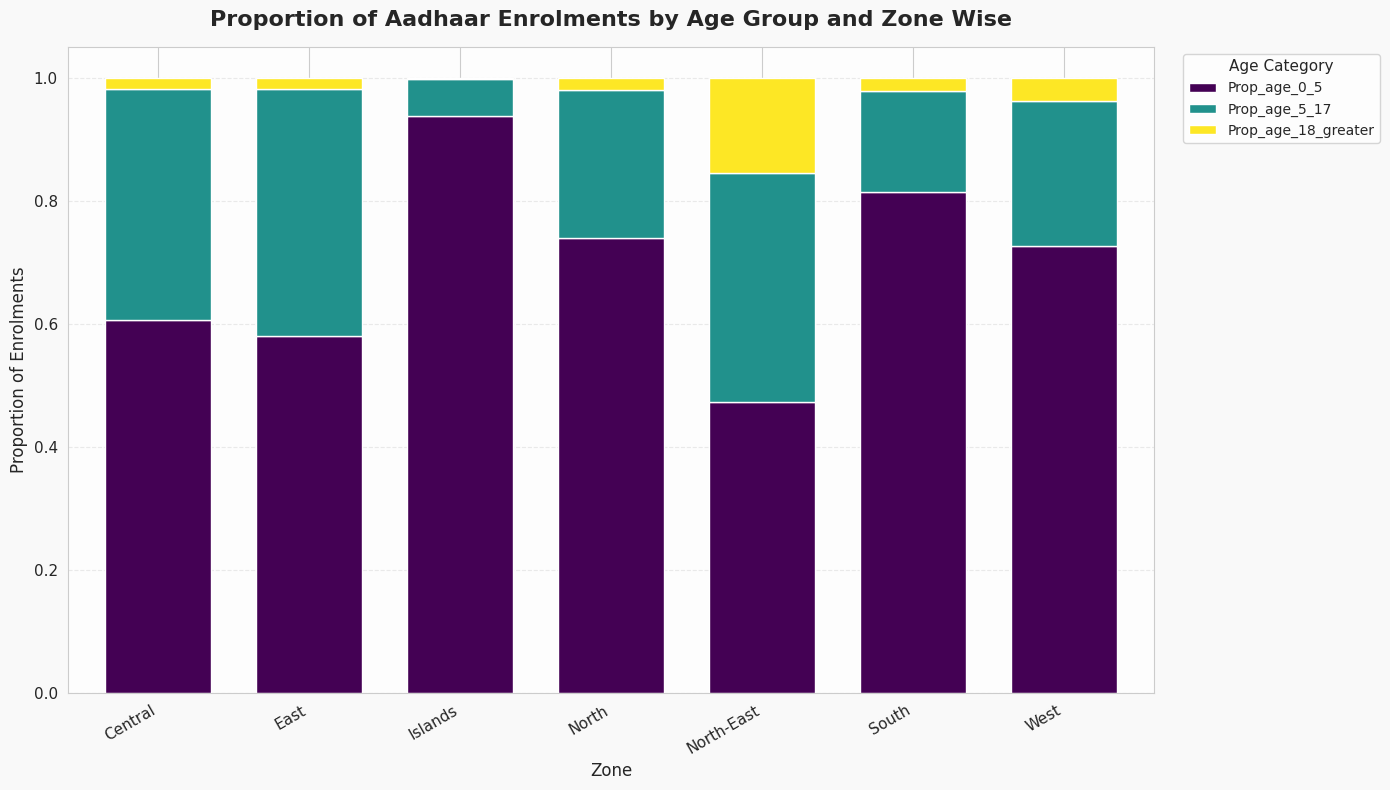

In [136]:
plt.figure(figsize=(14, 8), facecolor='#f9f9f9')

ax = regional_age_distribution[
    ['Prop_age_0_5', 'Prop_age_5_17', 'Prop_age_18_greater']
].plot(
    kind='bar',
    stacked=True,
    figsize=(14, 8),
    cmap='viridis',
    edgecolor='white',
    width=0.7,
    ax=plt.gca()
)

ax.set_facecolor('#fdfdfd')

plt.title(
    'Proportion of Aadhaar Enrolments by Age Group and Zone Wise',
    fontsize=16,
    fontweight='bold',
    pad=15
)

plt.xlabel('Zone', fontsize=12)
plt.ylabel('Proportion of Enrolments', fontsize=12)

plt.xticks(rotation=30, ha='right', fontsize=11)
plt.yticks(fontsize=11)

plt.legend(
    title='Age Category',
    fontsize=10,
    title_fontsize=11,
    bbox_to_anchor=(1.02, 1),
    loc='upper left'
)

plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


## 4.11 Line Plot : Monthly Aadhaar Enrollments by Age Category

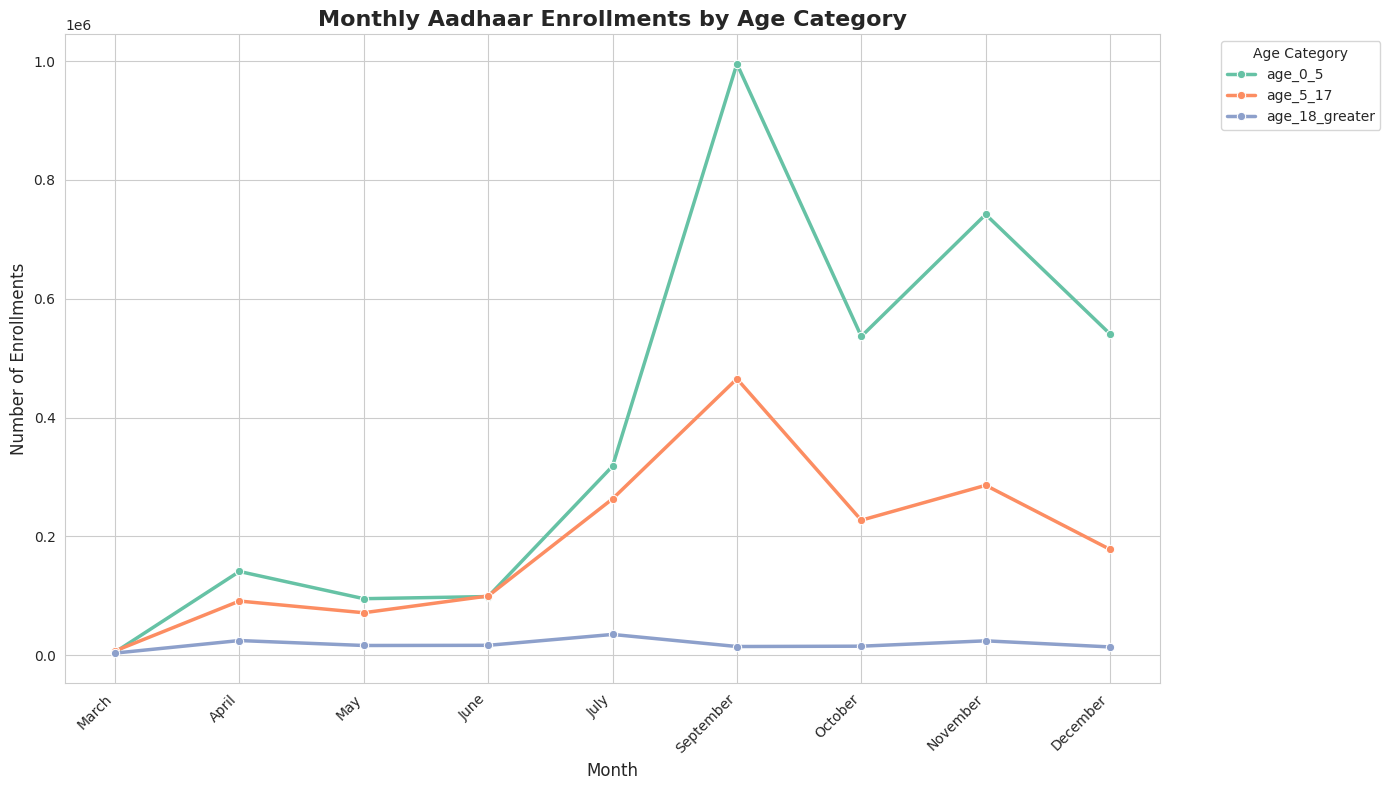

In [137]:

monthly_age_enrollments = df.groupby('month')[['age_0_5', 'age_5_17', 'age_18_greater']].sum().reset_index()

month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}
monthly_age_enrollments['Month_Name'] = monthly_age_enrollments['month'].map(month_names)
month_order = monthly_age_enrollments['Month_Name'].tolist()

melted_df = monthly_age_enrollments.melt(
    id_vars='Month_Name',
    value_vars=['age_0_5', 'age_5_17', 'age_18_greater'],
    var_name='Age Category',
    value_name='Enrollments'
)


melted_df['Month_Name'] = pd.Categorical(
    melted_df['Month_Name'],
    categories=month_order,
    ordered=True
)


plt.figure(figsize=(14, 8))
sns.set_style("whitegrid")

sns.lineplot(
    data=melted_df,
    x='Month_Name',
    y='Enrollments',
    hue='Age Category',
    marker='o',
    linewidth=2.5,
    palette='Set2'
)

plt.title('Monthly Aadhaar Enrollments by Age Category', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Enrollments', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Age Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [138]:
state_age_enrollments = df.groupby('state')[['age_0_5', 'age_5_17', 'age_18_greater']].sum()
state_age_enrollments['Total_Enrollments'] = state_age_enrollments.sum(axis=1)

age_categories = ['age_0_5', 'age_5_17', 'age_18_greater']
for col in age_categories:
    state_age_enrollments[f'Prop_{col}'] = state_age_enrollments[col] / state_age_enrollments['Total_Enrollments']

print("State-wise age enrollments and their proportions:")
display(state_age_enrollments.head())

State-wise age enrollments and their proportions:


,age_0_5,age_5_17,age_18_greater,Total_Enrollments,Prop_age_0_5,Prop_age_5_17,Prop_age_18_greater
state,,,,,,,
Andaman and Nicobar Islands,459,32,0,491,0.934827,0.065173,0.000000
Andhra Pradesh,109394,13414,1465,124273,0.880272,0.107940,0.011789
Arunachal Pradesh,1914,2176,150,4240,0.451415,0.513208,0.035377
Assam,137970,64834,22555,225359,0.612223,0.287692,0.100085
Bihar,254911,327043,11799,593753,0.429322,0.550806,0.019872


## 4.12 Stacked Bar Chart : Proportion of Aadhar Enrollments by Age Category and State

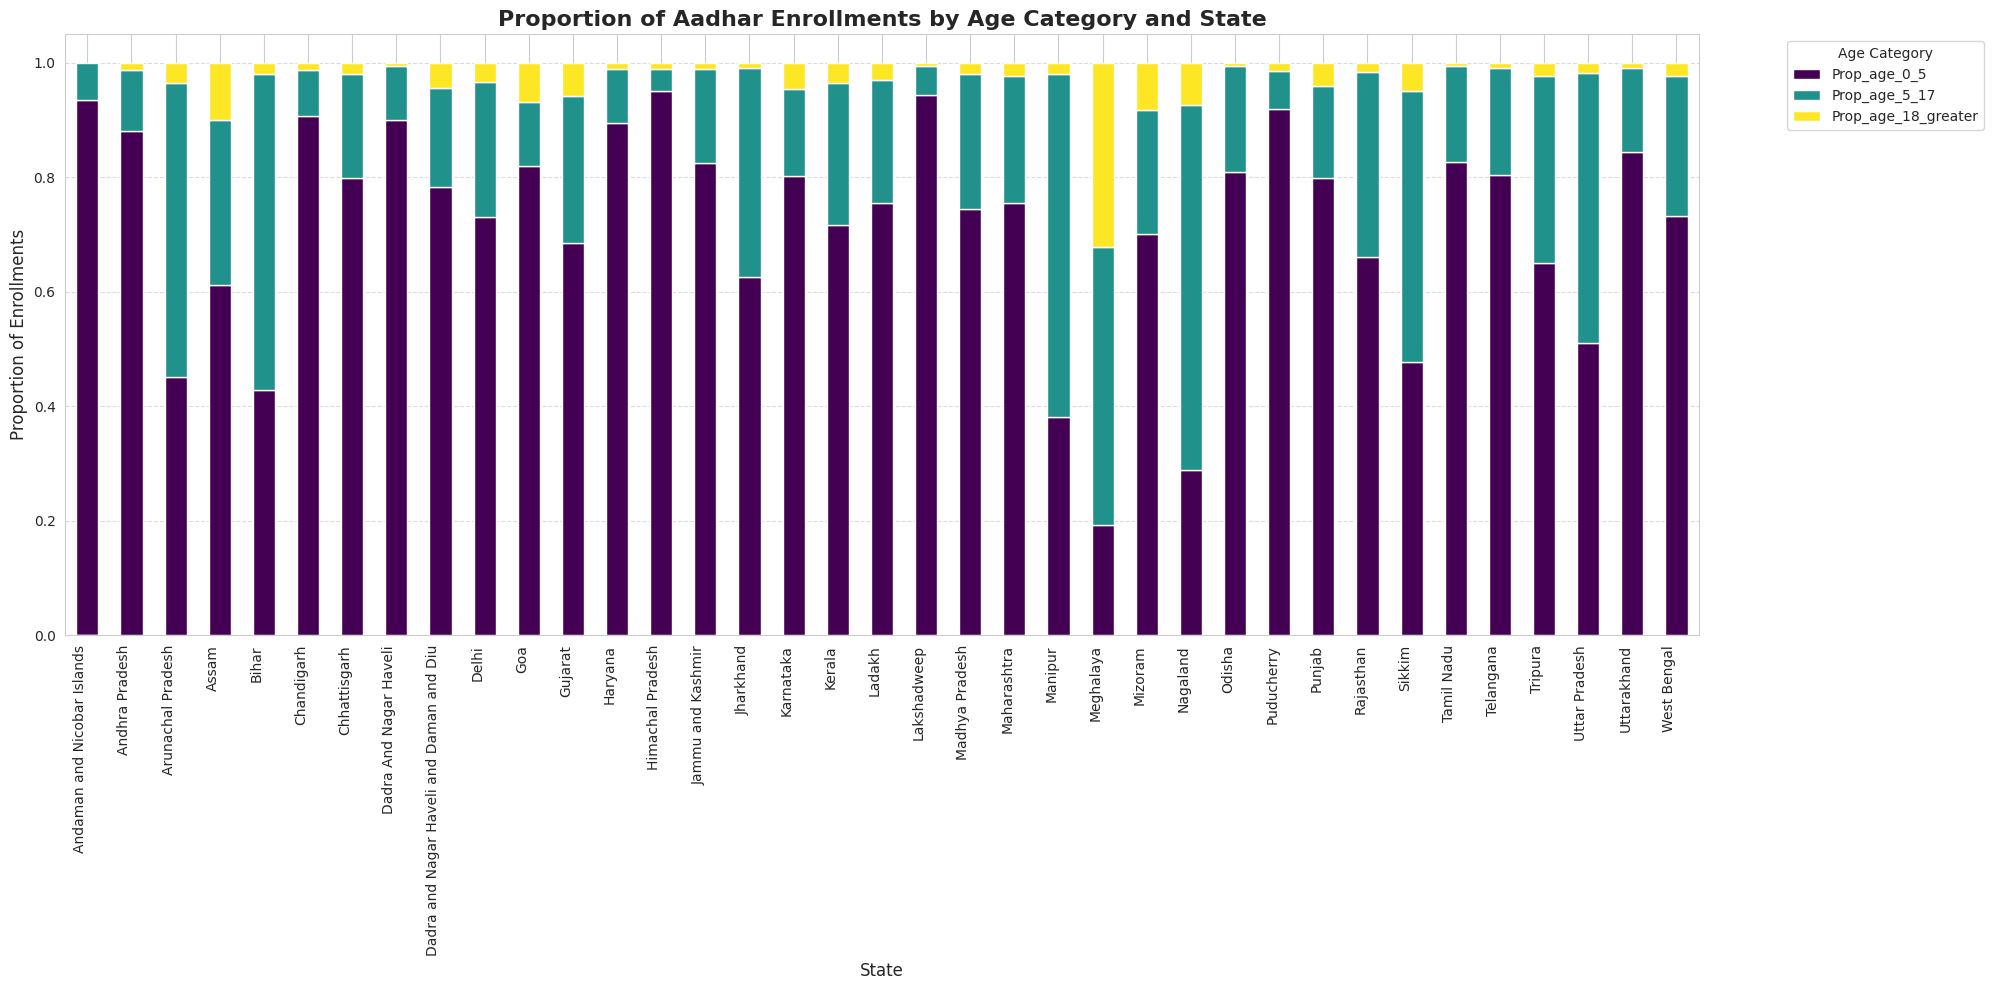

In [139]:
plt.figure(figsize=(20, 10))

state_age_enrollments[['Prop_age_0_5', 'Prop_age_5_17', 'Prop_age_18_greater']].plot(kind='bar', stacked=True, figsize=(20, 10), cmap='viridis', ax=plt.gca())

plt.title('Proportion of Aadhar Enrollments by Age Category and State', fontsize=16, fontweight='bold')
plt.xlabel('State', fontsize=12)
plt.ylabel('Proportion of Enrollments', fontsize=12)
plt.xticks(rotation=90, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Age Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [140]:
state_age_enrollments = df.groupby('state')[['age_0_5', 'age_5_17', 'age_18_greater']].sum()
state_age_enrollments['Total_Enrollments'] = state_age_enrollments.sum(axis=1)

age_categories = ['age_0_5', 'age_5_17', 'age_18_greater']
for col in age_categories:
    state_age_enrollments[f'Prop_{col}'] = state_age_enrollments[col] / state_age_enrollments['Total_Enrollments']

print("State-wise age enrollments and their proportions:")
display(state_age_enrollments.head())

State-wise age enrollments and their proportions:


,age_0_5,age_5_17,age_18_greater,Total_Enrollments,Prop_age_0_5,Prop_age_5_17,Prop_age_18_greater
state,,,,,,,
Andaman and Nicobar Islands,459,32,0,491,0.934827,0.065173,0.000000
Andhra Pradesh,109394,13414,1465,124273,0.880272,0.107940,0.011789
Arunachal Pradesh,1914,2176,150,4240,0.451415,0.513208,0.035377
Assam,137970,64834,22555,225359,0.612223,0.287692,0.100085
Bihar,254911,327043,11799,593753,0.429322,0.550806,0.019872


In [141]:
september_enrollments = df[df['month'] == 9]
september_daily_enrollments = september_enrollments.groupby('day')[['age_0_5', 'age_5_17', 'age_18_greater']].sum()
september_daily_enrollments['Total_Enrollments'] = september_daily_enrollments.sum(axis=1)

print("Total Aadhar enrollments per day in September:")
display(september_daily_enrollments)

Total Aadhar enrollments per day in September:


,age_0_5,age_5_17,age_18_greater,Total_Enrollments
day,,,,
1,48737,25156,1077,74970
2,50541,24998,945,76484
3,47832,23300,843,71975
4,43044,21463,829,65336
5,18398,7238,431,26067
6,40149,18243,555,58947
7,10305,4197,156,14658
8,57650,24816,877,83343
9,60507,27138,854,88499


## 4.13 : Line Plot Total Aadhar Enrollments per Day in September

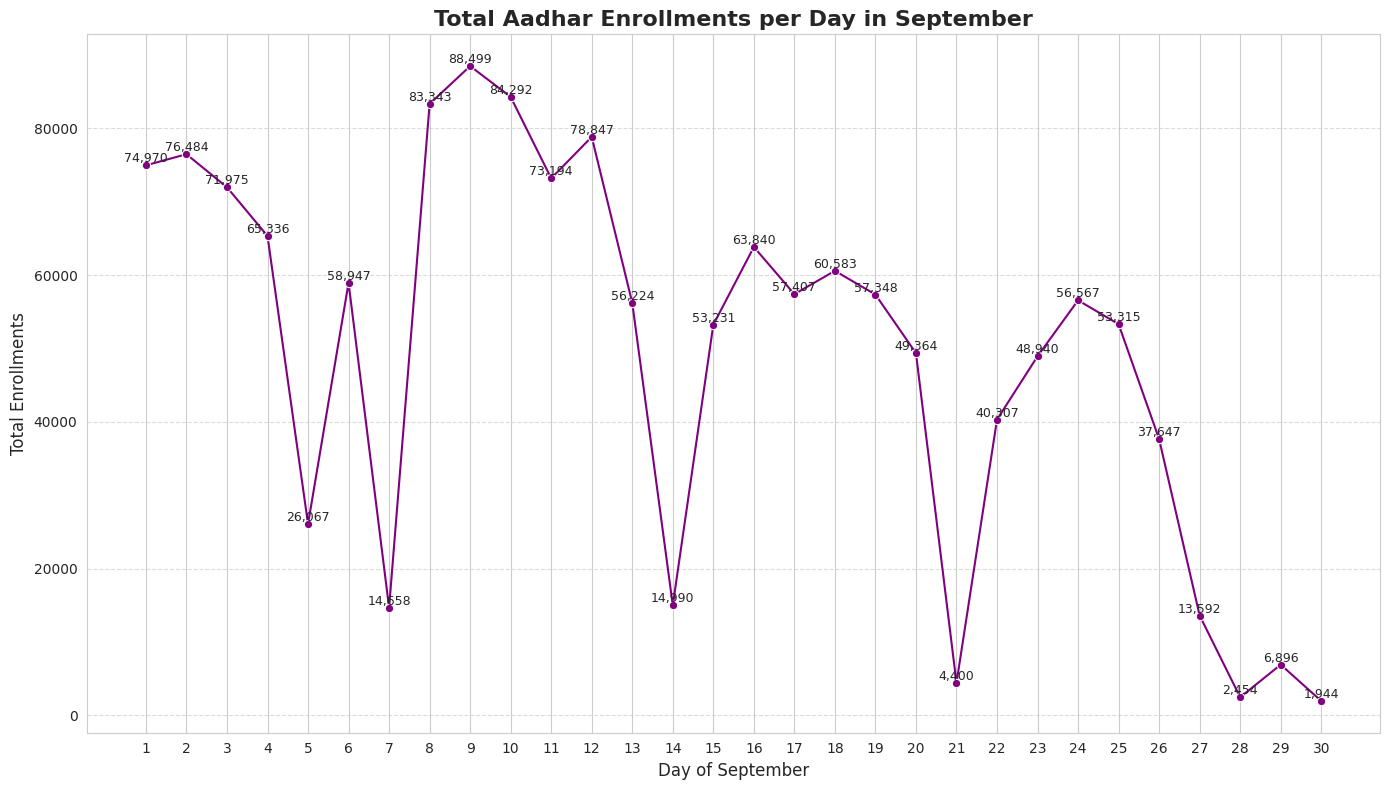

In [142]:
plt.figure(figsize=(14, 8))
sns.lineplot(x=september_daily_enrollments.index, y='Total_Enrollments', data=september_daily_enrollments, marker='o', color='purple')


for index, row in september_daily_enrollments.iterrows():
    plt.text(row.name, row['Total_Enrollments'], f"{row['Total_Enrollments']:,}", ha='center', va='bottom', fontsize=9)

plt.title('Total Aadhar Enrollments per Day in September', fontsize=16, fontweight='bold')
plt.xlabel('Day of September', fontsize=12)
plt.ylabel('Total Enrollments', fontsize=12)
plt.xticks(september_daily_enrollments.index, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [143]:
september_enrollments_df = df[df['month'] == 9]

september_regional_daily_enrollments = september_enrollments_df.groupby(['day', 'geographical'])[['age_0_5', 'age_5_17', 'age_18_greater']].sum()
september_regional_daily_enrollments['Total_Enrollments'] = september_regional_daily_enrollments.sum(axis=1)

print("Total Aadhar enrollments per day in September by geographical region:")
display(september_regional_daily_enrollments.head())

Total Aadhar enrollments per day in September by geographical region:


age_0_5  age_5_17  age_18_greater  Total_Enrollments
day geographical                                                      
1   Central         11461      8774             177              20412
    East            11770      8158             157              20085
    Islands            23         3               0                 26
    North            6020      2255              68               8343
    North-East       3133      1591             369               5093

In [144]:

september_enrollments_df = df[df['month'] == 9]


september_daily_age_enrollments = september_enrollments_df.groupby('day')[['age_0_5', 'age_5_17', 'age_18_greater']].sum().reset_index()


melted_september_age_df = september_daily_age_enrollments.melt('day', var_name='Age_Category', value_name='Enrollments')

print("Daily Aadhar enrollments by age category in September (first 5 rows):")
display(melted_september_age_df.head())

Daily Aadhar enrollments by age category in September (first 5 rows):


,day,Age_Category,Enrollments
0,1,age_0_5,48737
1,2,age_0_5,50541
2,3,age_0_5,47832
3,4,age_0_5,43044
4,5,age_0_5,18398


## 4.14 Line Chart : Daily Aadhar Enrollments by Age Category in September

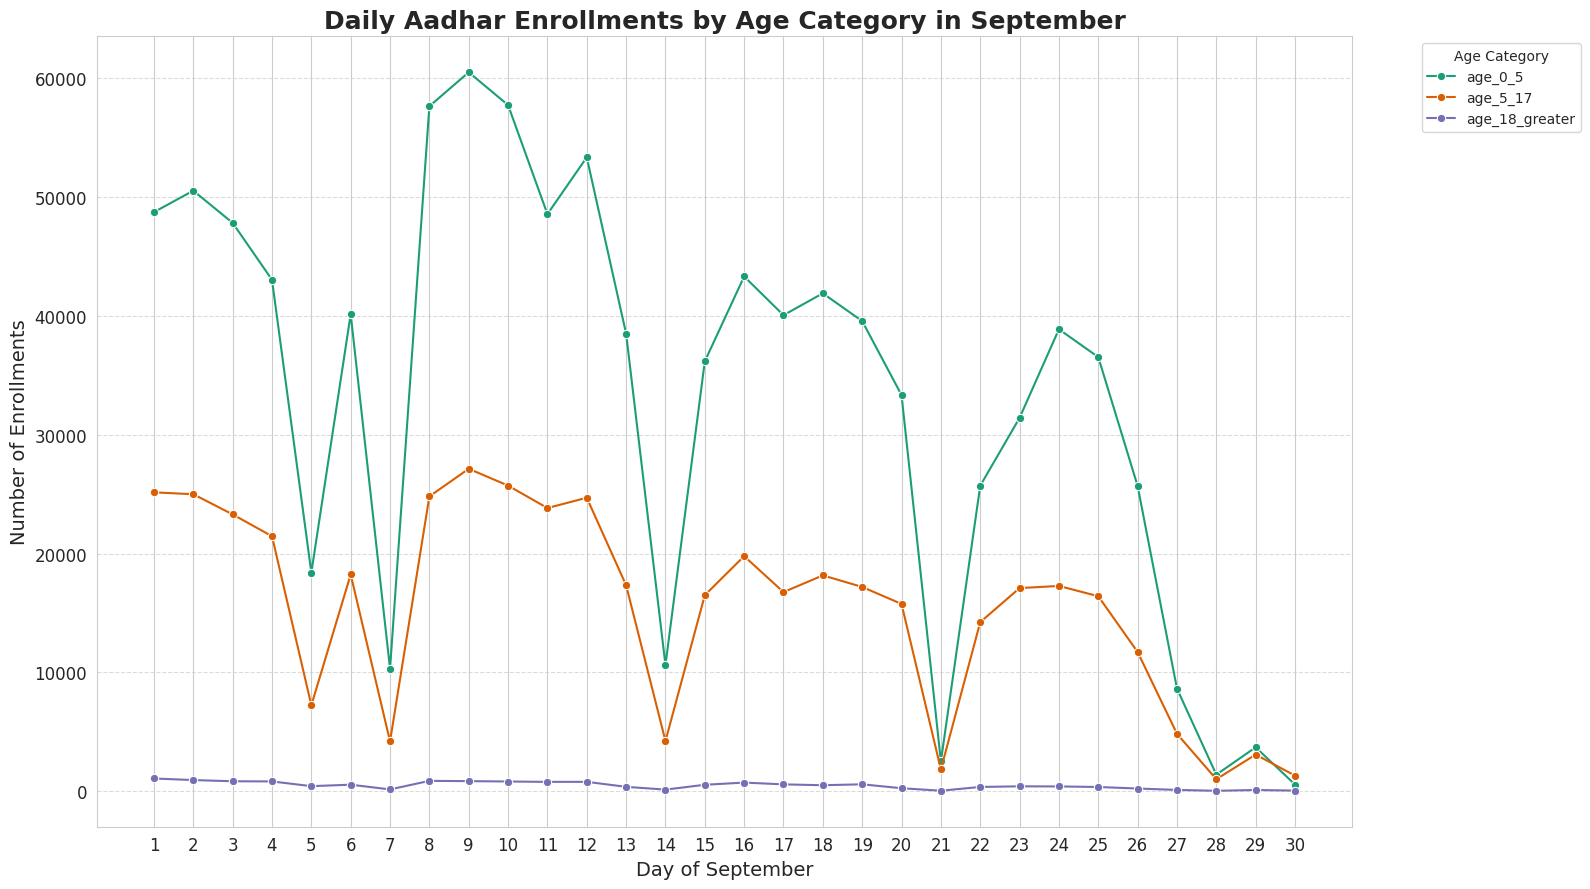

In [145]:
plt.figure(figsize=(16, 9))
sns.lineplot(
    data=melted_september_age_df,
    x='day',
    y='Enrollments',
    hue='Age_Category',
    marker='o',
    palette='Dark2'
)

plt.title('Daily Aadhar Enrollments by Age Category in September', fontsize=18, fontweight='bold')
plt.xlabel('Day of September', fontsize=14)
plt.ylabel('Number of Enrollments', fontsize=14)
plt.xticks(september_daily_age_enrollments['day'].unique(), fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Age Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## 4.15 Line Chart : Daily Aadhar Enrollments by Geographical Region in September

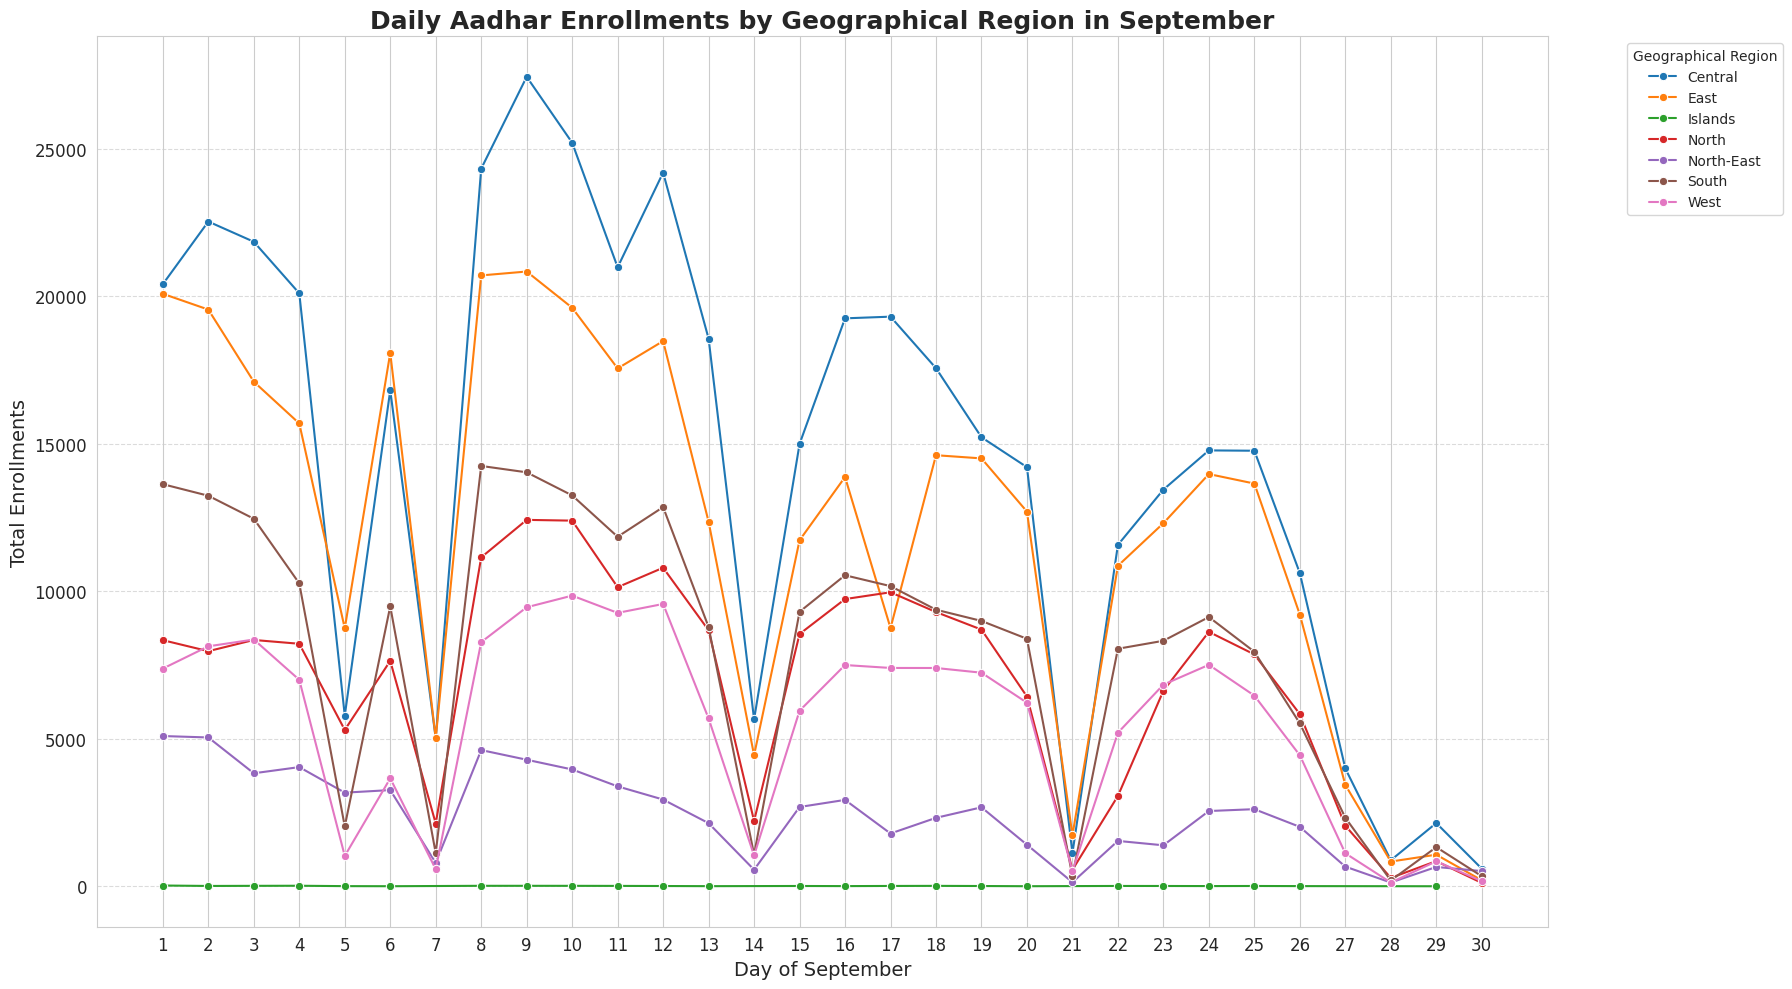

In [146]:
plt.figure(figsize=(18, 10))
sns.lineplot(
    data=september_regional_daily_enrollments.reset_index(),
    x='day',
    y='Total_Enrollments',
    hue='geographical',
    marker='o',
    palette='tab10'
)

plt.title('Daily Aadhar Enrollments by Geographical Region in September', fontsize=18, fontweight='bold')
plt.xlabel('Day of September', fontsize=14)
plt.ylabel('Total Enrollments', fontsize=14)
plt.xticks(september_regional_daily_enrollments.index.get_level_values('day').unique(), fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Geographical Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# ------------------------------ OVER ----------------------  